# Pandas tutorial

20 min total (48 lines, 2.5/min)

1. Importing (2 min) (3 lines)
2. Basic manipulation (4 min) (11 lines)
3. Plotting (3 min) (6 lines)
4. Merging/Reshaping (7 min) (17 lines)
5. Dealing with missing values (4 min) (11 lines)

Last updated: Rohan Isaac, 11 October 2016

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Importing and exporting data
Use autocomplete to find out what all you can import (all start with read_). For details see

http://pandas.pydata.org/pandas-docs/stable/io.html

In [2]:
eco = pd.read_csv('ECO_DR1_withradec.csv')

Get a sense of what exists in the database

Also see pd.tail() ...
Note that jupyter notebooks output the results of the last expression evaluated, i.e. all these eco.head() etc. are returning a dataframe (the fundamental object in pandas)

In [3]:
eco.head()

,NAME,RADEG,DEDEG,CZ,LOGMSTAR,MODELU_RCORR,R90,MORPHEL,GRPCZ,FC,LOGMH,DEN1MPC
0,ECO00001,139.374,25.966,6454.9,10.73,1.48,33.7,L,6454.9,1,12.17,0.54
1,ECO00002,185.078,8.533,4338.9,9.37,1.06,17.3,L,4293.3,1,11.21,0.65
2,ECO00003,144.112,9.606,5443.5,8.19,0.87,21.6,L,5425.4,0,11.14,1.03
3,ECO00004,144.992,9.179,6374.6,8.45,0.88,10.0,L,6374.6,1,10.77,0.31
4,ECO00005,145.612,10.219,5713.0,8.79,1.40,7.7,E,5713.0,1,10.77,0.64


Some useful output features (all start with to_)

In [4]:
eco.head().to_latex()

u'\\begin{tabular}{llrrrrrrlrrrr}\n\\toprule\n{} &      NAME &    RADEG &   DEDEG &      CZ &  LOGMSTAR &  MODELU\\_RCORR &   R90 & MORPHEL &   GRPCZ &  FC &  LOGMH &  DEN1MPC \\\\\n\\midrule\n0 &  ECO00001 &  139.374 &  25.966 &  6454.9 &     10.73 &          1.48 &  33.7 &       L &  6454.9 &   1 &  12.17 &     0.54 \\\\\n1 &  ECO00002 &  185.078 &   8.533 &  4338.9 &      9.37 &          1.06 &  17.3 &       L &  4293.3 &   1 &  11.21 &     0.65 \\\\\n2 &  ECO00003 &  144.112 &   9.606 &  5443.5 &      8.19 &          0.87 &  21.6 &       L &  5425.4 &   0 &  11.14 &     1.03 \\\\\n3 &  ECO00004 &  144.992 &   9.179 &  6374.6 &      8.45 &          0.88 &  10.0 &       L &  6374.6 &   1 &  10.77 &     0.31 \\\\\n4 &  ECO00005 &  145.612 &  10.219 &  5713.0 &      8.79 &          1.40 &   7.7 &       E &  5713.0 &   1 &  10.77 &     0.64 \\\\\n\\bottomrule\n\\end{tabular}\n'

## Basic manipulation

1. Viewing
2. Basic stats
3. Indexing
4. Boolean filtering

Accessing basic table information

In [5]:
print eco.columns, eco.index

Index([u'NAME', u'RADEG', u'DEDEG', u'CZ', u'LOGMSTAR', u'MODELU_RCORR',
       u'R90', u'MORPHEL', u'GRPCZ', u'FC', u'LOGMH', u'DEN1MPC'],
      dtype='object') Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            12671, 12672, 12673, 12674, 12675, 12676, 12677, 12678, 12679,
            12680],
           dtype='int64', length=12681)


In [6]:
eco.dtypes

NAME             object
RADEG           float64
DEDEG           float64
CZ              float64
LOGMSTAR        float64
MODELU_RCORR    float64
R90             float64
MORPHEL          object
GRPCZ           float64
FC                int64
LOGMH           float64
DEN1MPC         float64
dtype: object

In [7]:
eco.shape

(12681, 12)

In [8]:
eco.describe()

,RADEG,DEDEG,CZ,LOGMSTAR,MODELU_RCORR,R90,GRPCZ,FC,LOGMH,DEN1MPC
count,12681.000000,12681.000000,12681.000000,12681.000000,12681.000000,12681.000000,12681.000000,12681.000000,12681.000000,12681.000000
mean,182.848394,22.144056,6165.728831,9.404953,1.414774,21.702066,6165.721725,0.699077,11.595976,1.834956
std,25.587928,13.012150,1136.019986,0.712201,1.055519,16.350912,1129.628404,0.458677,0.874147,3.311597
min,130.065000,-0.998000,2532.800000,6.390000,-99.990000,-99.900000,2532.800000,0.000000,10.740000,0.000000
25%,163.735000,11.305000,5696.500000,8.810000,0.950000,11.900000,5721.400000,0.000000,10.960000,0.520000
50%,183.040000,22.276000,6516.900000,9.290000,1.250000,17.500000,6536.400000,1.000000,11.290000,0.950000
75%,202.103000,31.671000,6989.600000,9.930000,1.980000,26.200000,6978.000000,1.000000,11.920000,1.820000
max,237.445000,49.845000,7470.000000,11.770000,3.110000,221.100000,7469.900000,1.000000,14.450000,27.790000


Selecting only particluar columns by names

In [9]:
eco[['CZ', 'GRPCZ']].head()

,CZ,GRPCZ
0,6454.9,6454.9
1,4338.9,4293.3
2,5443.5,5425.4
3,6374.6,6374.6
4,5713.0,5713.0


Selecting by index

In [10]:
eco.iloc[5:10, 10:12]

,LOGMH,DEN1MPC
5,10.77,0.37
6,10.76,1.52
7,10.76,0.32
8,10.75,0.41
9,10.78,0.20


Boolean selection

In [11]:
eco[eco['R90'] < 3]

,NAME,RADEG,DEDEG,CZ,LOGMSTAR,MODELU_RCORR,R90,MORPHEL,GRPCZ,FC,LOGMH,DEN1MPC
1043,ECO01044,149.278,5.129,5179.2,9.63,1.47,2.5,E,5179.2,1,11.55,0.28
1093,ECO01094,180.866,22.038,6383.6,9.35,1.54,2.5,E,6412.5,1,11.25,1.41
1097,ECO01098,235.230,4.486,3901.5,8.93,1.10,2.7,E,3901.5,1,11.18,0.42
7299,ECO07300,182.630,0.673,5845.1,9.35,2.31,2.9,E,5960.5,0,12.04,3.97
12680,ECO12681,142.441,2.201,6823.4,9.39,-99.99,-99.9,E,7121.6,0,12.82,1.74


Multiple criteria

In [12]:
eco[(eco['R90'] < 3.5) & (eco['R90'] > 3)]['NAME']

1168     ECO01169
2028     ECO02029
11060    ECO11061
11447    ECO11448
Name: NAME, dtype: object

Using the underlying numpy values

In [13]:
arr1 = eco[['RADEG', 'DEDEG']].values
print type(arr1)
arr1

<type 'numpy.ndarray'>


array([[ 139.374,   25.966],
       [ 185.078,    8.533],
       [ 144.112,    9.606],
       ..., 
       [ 191.969,   18.053],
       [ 181.121,    1.894],
       [ 142.441,    2.201]])

##  Applying functions

In [14]:
eco['vel_diff'] = eco['CZ'] - eco['GRPCZ']

In [15]:
eco['m_vel_sum'] = (eco.CZ + eco.GRPCZ)/1000

In [16]:
eco[['MSTAR', 'MH']] = eco[['LOGMSTAR', 'LOGMH']].apply(np.exp)
eco.head()

,NAME,RADEG,DEDEG,CZ,LOGMSTAR,MODELU_RCORR,R90,MORPHEL,GRPCZ,FC,LOGMH,DEN1MPC,vel_diff,m_vel_sum,MSTAR,MH
0,ECO00001,139.374,25.966,6454.9,10.73,1.48,33.7,L,6454.9,1,12.17,0.54,0.0,12.9098,45706.692026,192914.043845
1,ECO00002,185.078,8.533,4338.9,9.37,1.06,17.3,L,4293.3,1,11.21,0.65,45.6,8.6322,11731.115087,73865.414993
2,ECO00003,144.112,9.606,5443.5,8.19,0.87,21.6,L,5425.4,0,11.14,1.03,18.1,10.8689,3604.722246,68871.656444
3,ECO00004,144.992,9.179,6374.6,8.45,0.88,10.0,L,6374.6,1,10.77,0.31,0.0,12.7492,4675.072736,47572.017514
4,ECO00005,145.612,10.219,5713.0,8.79,1.40,7.7,E,5713.0,1,10.77,0.64,0.0,11.4260,6568.232175,47572.017514


In [17]:
eco.drop('vel_diff', axis=1, inplace=True)
eco.head()

,NAME,RADEG,DEDEG,CZ,LOGMSTAR,MODELU_RCORR,R90,MORPHEL,GRPCZ,FC,LOGMH,DEN1MPC,m_vel_sum,MSTAR,MH
0,ECO00001,139.374,25.966,6454.9,10.73,1.48,33.7,L,6454.9,1,12.17,0.54,12.9098,45706.692026,192914.043845
1,ECO00002,185.078,8.533,4338.9,9.37,1.06,17.3,L,4293.3,1,11.21,0.65,8.6322,11731.115087,73865.414993
2,ECO00003,144.112,9.606,5443.5,8.19,0.87,21.6,L,5425.4,0,11.14,1.03,10.8689,3604.722246,68871.656444
3,ECO00004,144.992,9.179,6374.6,8.45,0.88,10.0,L,6374.6,1,10.77,0.31,12.7492,4675.072736,47572.017514
4,ECO00005,145.612,10.219,5713.0,8.79,1.40,7.7,E,5713.0,1,10.77,0.64,11.4260,6568.232175,47572.017514


## Quick plotting

http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [18]:
print plt.style.available
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


Note `plot(kind='hist', ...)` equivalent to `plot.hist(...)` etc.

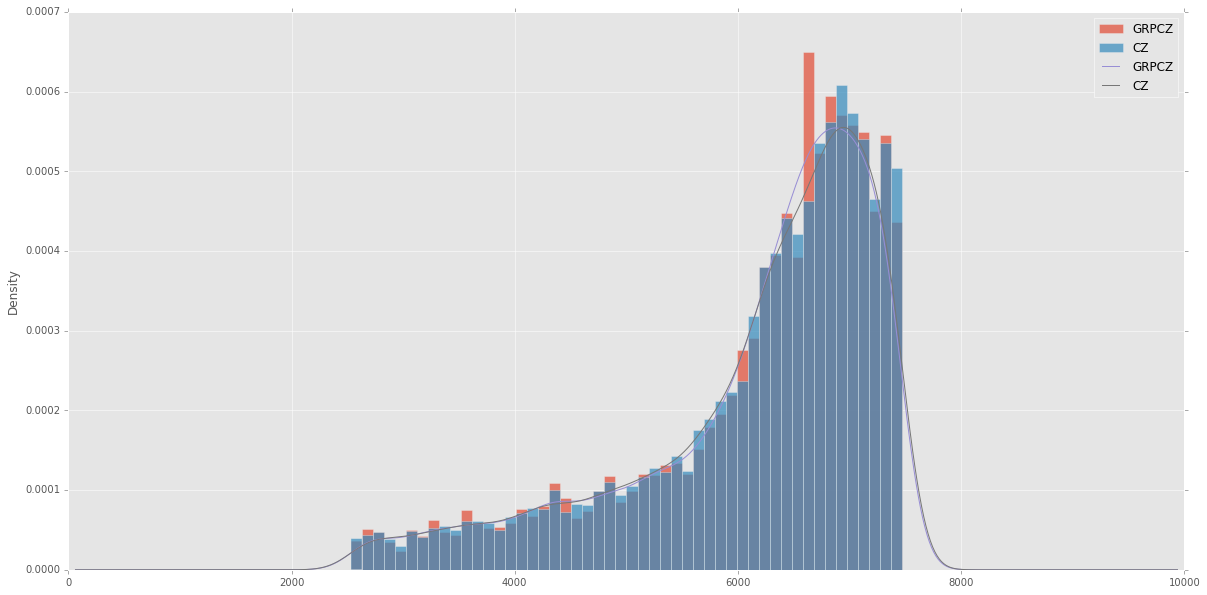

In [19]:
ax = eco[['GRPCZ', 'CZ']].plot(kind='hist', bins=50, alpha=0.7, normed=True)
eco[['GRPCZ', 'CZ']].plot(kind='kde', ax=ax)

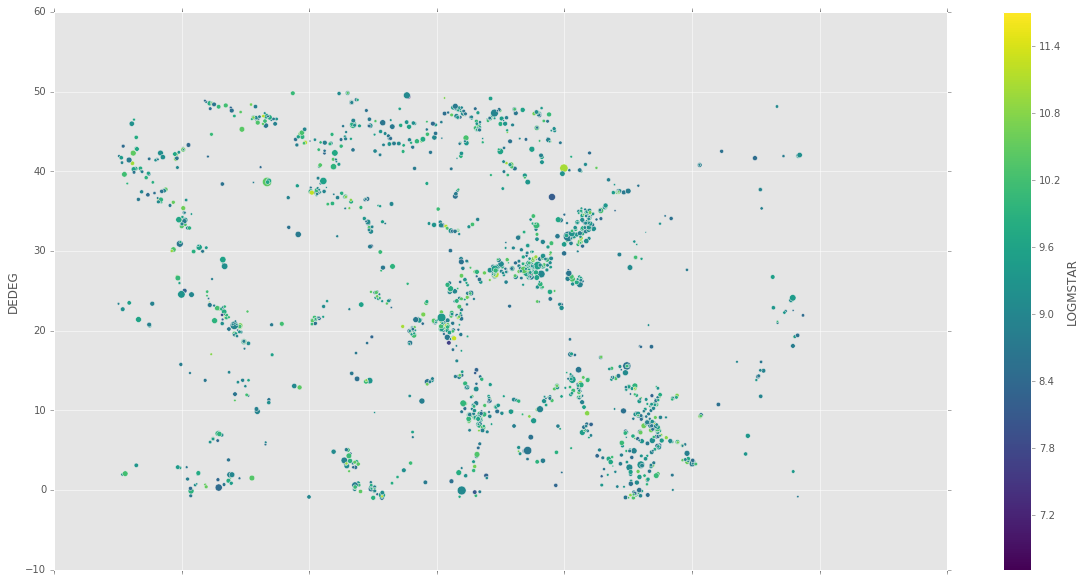

In [20]:
eco[eco.CZ > 7200].plot(x='RADEG', y='DEDEG', c='LOGMSTAR', s=eco['R90'], kind='scatter', cmap='viridis')

## Merge and reshape

Basic joining (concatenate) (http://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png) and reshaping are similar to what can be done on numpy array, not going into details here. Focus on more interesting features now.

Merging (SQL join) two tables based a common value

In [21]:
eco.columns

Index([u'NAME', u'RADEG', u'DEDEG', u'CZ', u'LOGMSTAR', u'MODELU_RCORR',
       u'R90', u'MORPHEL', u'GRPCZ', u'FC', u'LOGMH', u'DEN1MPC', u'm_vel_sum',
       u'MSTAR', u'MH'],
      dtype='object')

In [22]:
t1 = eco[['NAME', 'RADEG', 'DEDEG']].head(50)
t2 = eco[eco['LOGMSTAR'] < 8.5]

In [23]:
print t1.shape
t1.head()

(50, 3)


,NAME,RADEG,DEDEG
0,ECO00001,139.374,25.966
1,ECO00002,185.078,8.533
2,ECO00003,144.112,9.606
3,ECO00004,144.992,9.179
4,ECO00005,145.612,10.219


In [24]:
print t2.shape
t2.head()

(800, 15)


,NAME,RADEG,DEDEG,CZ,LOGMSTAR,MODELU_RCORR,R90,MORPHEL,GRPCZ,FC,LOGMH,DEN1MPC,m_vel_sum,MSTAR,MH
2,ECO00003,144.112,9.606,5443.5,8.19,0.87,21.6,L,5425.4,0,11.14,1.03,10.8689,3604.722246,68871.656444
3,ECO00004,144.992,9.179,6374.6,8.45,0.88,10.0,L,6374.6,1,10.77,0.31,12.7492,4675.072736,47572.017514
5,ECO00006,148.788,5.728,6962.2,8.31,0.95,9.9,L,6962.2,1,10.77,0.37,13.9244,4064.312984,47572.017514
6,ECO00007,149.419,10.124,5230.4,8.39,1.20,17.8,L,5230.4,1,10.76,1.52,10.4608,4402.817694,47098.668031
7,ECO00008,155.820,9.225,4580.1,8.43,0.95,21.5,L,4580.1,1,10.76,0.32,9.1602,4582.500093,47098.668031


In [25]:
tin = pd.merge(t1, t2, how='inner')
print tin.shape
tin.head()

(23, 15)


,NAME,RADEG,DEDEG,CZ,LOGMSTAR,MODELU_RCORR,R90,MORPHEL,GRPCZ,FC,LOGMH,DEN1MPC,m_vel_sum,MSTAR,MH
0,ECO00003,144.112,9.606,5443.5,8.19,0.87,21.6,L,5425.4,0,11.14,1.03,10.8689,3604.722246,68871.656444
1,ECO00004,144.992,9.179,6374.6,8.45,0.88,10.0,L,6374.6,1,10.77,0.31,12.7492,4675.072736,47572.017514
2,ECO00006,148.788,5.728,6962.2,8.31,0.95,9.9,L,6962.2,1,10.77,0.37,13.9244,4064.312984,47572.017514
3,ECO00007,149.419,10.124,5230.4,8.39,1.20,17.8,L,5230.4,1,10.76,1.52,10.4608,4402.817694,47098.668031
4,ECO00008,155.820,9.225,4580.1,8.43,0.95,21.5,L,4580.1,1,10.76,0.32,9.1602,4582.500093,47098.668031


In [26]:
tout = pd.merge(t1, t2, how='outer')
print tout.shape
tout.head()

(827, 15)


,NAME,RADEG,DEDEG,CZ,LOGMSTAR,MODELU_RCORR,R90,MORPHEL,GRPCZ,FC,LOGMH,DEN1MPC,m_vel_sum,MSTAR,MH
0,ECO00001,139.374,25.966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ECO00002,185.078,8.533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ECO00003,144.112,9.606,5443.5,8.19,0.87,21.6,L,5425.4,0,11.14,1.03,10.8689,3604.722246,68871.656444
3,ECO00004,144.992,9.179,6374.6,8.45,0.88,10.0,L,6374.6,1,10.77,0.31,12.7492,4675.072736,47572.017514
4,ECO00005,145.612,10.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Summarizing -- using pivot tables

values: values we are interested in
columns: columns we want to group over

In [27]:
pd.pivot_table(eco, values=['CZ', 'GRPCZ'], columns=['MORPHEL'], aggfunc=np.median)

MORPHEL,E,L,None
CZ,6525.6,6515.2,5544.85
GRPCZ,6565.4,6522.8,5658.70


Can add an additional parameter to index over (here FC: flag indicating central or satellite)

In [28]:
summary = pd.pivot_table(eco, values=['CZ', 'GRPCZ'], index=['FC'], columns=['MORPHEL'], aggfunc=np.median)
summary

CZ                    GRPCZ                
MORPHEL        E       L    None        E       L    None
FC                                                       
0        6574.20  6575.6  6361.3  6589.00  6589.0  6589.0
1        6486.75  6487.4  4728.4  6488.35  6490.8  4728.4

Note this is no longer tidy data (see Erin Conn's seaborn presentation), which is necessary not only for seaborn, but also for a number of the standard ML algorithms. Can convert it using melt (has more options)

In [29]:
pd.melt(summary)

,None,MORPHEL,value
0,CZ,E,6574.20
1,CZ,E,6486.75
2,CZ,L,6575.60
3,CZ,L,6487.40
4,CZ,None,6361.30
5,CZ,None,4728.40
6,GRPCZ,E,6589.00
7,GRPCZ,E,6488.35
8,GRPCZ,L,6589.00
9,GRPCZ,L,6490.80


##  Working with missing data

Looking at unique values using value_counts()

In [30]:
eco.FC.value_counts()

1    8865
0    3816
Name: FC, dtype: int64

In [31]:
eco.MORPHEL.value_counts()

L       9401
E       3278
None       2
Name: MORPHEL, dtype: int64

In [32]:
eco.min()

NAME            ECO00001
RADEG            130.065
DEDEG             -0.998
CZ                2532.8
LOGMSTAR            6.39
MODELU_RCORR      -99.99
R90                -99.9
MORPHEL                E
GRPCZ             2532.8
FC                     0
LOGMH              10.74
DEN1MPC                0
m_vel_sum         5.0656
MSTAR            595.857
MH               46166.1
dtype: object

Since in ECO missing data is denoted by -99, setting it as missing.

Note that missing values don't make into calulations or plots

In [33]:
eco.replace(-99.99, np.nan, inplace=True)
eco.replace(-99.9, np.nan, inplace=True)
eco.replace('None', np.nan, inplace=True)
eco.min()

NAME            ECO00001
RADEG            130.065
DEDEG             -0.998
CZ                2532.8
LOGMSTAR            6.39
MODELU_RCORR        0.49
R90                  2.5
MORPHEL              inf
GRPCZ             2532.8
FC                     0
LOGMH              10.74
DEN1MPC                0
m_vel_sum         5.0656
MSTAR            595.857
MH               46166.1
dtype: object

In [34]:
eco.count(axis=0)

NAME            12681
RADEG           12681
DEDEG           12681
CZ              12681
LOGMSTAR        12681
MODELU_RCORR    12680
R90             12680
MORPHEL         12679
GRPCZ           12681
FC              12681
LOGMH           12681
DEN1MPC         12681
m_vel_sum       12681
MSTAR           12681
MH              12681
dtype: int64

In [35]:
eco.shape

(12681, 15)

Drop all rows with missing values

In [36]:
eco.dropna(axis=0).shape

(12678, 15)

Replace the missing value with something

In [37]:
eco.fillna(eco.mean()).count(axis=0)

NAME            12681
RADEG           12681
DEDEG           12681
CZ              12681
LOGMSTAR        12681
MODELU_RCORR    12681
R90             12681
MORPHEL         12679
GRPCZ           12681
FC              12681
LOGMH           12681
DEN1MPC         12681
m_vel_sum       12681
MSTAR           12681
MH              12681
dtype: int64

Can also interpolate using df.interpolate, or custom values